# Reviewing rainfall levels by region for cyclone Chido

This notebook reviews how far from the rainfall trigger cyclone Chido was.

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.datasources import codab, imerg
from src.constants import *
from src import db_utils

In [3]:
adm1 = codab.load_codab(admin_level=1)

In [4]:
aoi_adm1_pcodes = adm1["ADM1_PCODE"].unique()
aoi_adm1_pcodes.shape

(22,)

In [5]:
# this is from Meteo-France site
landfall_df = pd.DataFrame(
    {
        "NAME": ["CHIDO"],
        "LON": [49.98],
        "LAT": [-11.21],
        "landfall_date": [pd.to_datetime("2024-12-13")],
    }
)
landfall_df

,NAME,LON,LAT,landfall_date
0,CHIDO,49.98,-11.21,2024-12-13


In [6]:
IMERG_START_DATE = pd.to_datetime("2000-06-01")
extra_days = 1
dfs = []
for sid, row in landfall_df.set_index("NAME").iterrows():
    landfall_date = row["landfall_date"]
    start_date = landfall_date - pd.Timedelta(days=extra_days)
    end_date = landfall_date + pd.Timedelta(days=extra_days)
    if end_date < IMERG_START_DATE:
        print(f"{row['NAME']} too early")
        continue
    df_in = imerg.fetch_imerg_data(aoi_adm1_pcodes, start_date, end_date)
    df_in["NAME"] = sid
    dfs.append(df_in)

In [7]:
imerg_df = pd.concat(dfs, ignore_index=True)
imerg_df

,iso3,pcode,valid_date,adm_level,mean,median,min,max,count,sum,std,NAME
0,MDG,MG11,2024-12-12,1,0.061137,0.000000,0.000,10.594999,585,35.765000,0.758842,CHIDO
1,MDG,MG11,2024-12-13,1,0.009094,0.000000,0.000,0.890000,585,5.320000,0.089335,CHIDO
2,MDG,MG12,2024-12-12,1,2.581969,0.000000,0.000,35.704998,617,1593.075000,5.470086,CHIDO
3,MDG,MG12,2024-12-13,1,0.103720,0.000000,0.000,4.110000,617,63.995000,0.547399,CHIDO
4,MDG,MG13,2024-12-12,1,0.098638,0.000000,0.000,10.594999,224,22.095000,0.737828,CHIDO
5,MDG,MG13,2024-12-13,1,0.033750,0.000000,0.000,1.890000,224,7.560000,0.250297,CHIDO
6,MDG,MG14,2024-12-12,1,1.304943,0.000000,0.000,74.700000,612,798.624940,7.152861,CHIDO
7,MDG,MG14,2024-12-13,1,0.026397,0.000000,0.000,2.900000,612,16.154999,0.239944,CHIDO
8,MDG,MG21,2024-12-12,1,2.867308,0.085000,0.000,51.680000,717,2055.859900,7.683760,CHIDO
9,MDG,MG21,2024-12-13,1,0.161939,0.000000,0.000,2.325000,717,116.109990,0.392143,CHIDO


In [17]:
adm_mean_sum = imerg_df.groupby("pcode")["mean"].sum().reset_index()
adm1_rain = adm1.merge(
    adm_mean_sum, left_on="ADM1_PCODE", right_on="pcode", how="left"
)

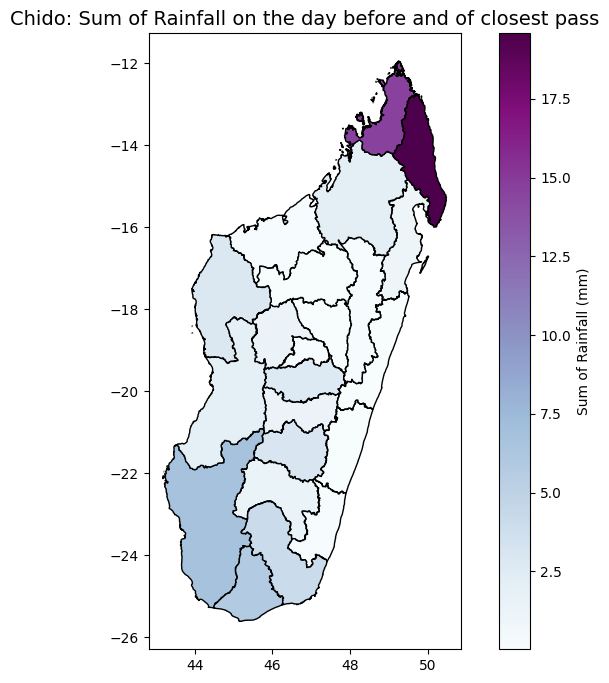

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

adm1_rain.plot(
    column="mean",
    cmap="BuPu",
    legend=True,
    legend_kwds={"label": "Sum of Rainfall (mm)"},
    edgecolor="black",
    ax=ax,
)
ax.set_title(
    "Chido: Sum of Rainfall on the day before and of closest pass", fontsize=14
)
plt.show()